In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime

### 한글 깨짐 방지

In [2]:
matplotlib.rc('font', family='NanumBarunGothic')

### CSV파일 읽기

In [3]:
tashu = pd.read_csv('tashu.csv')
station = pd.read_csv('station.csv')

## 1. 각 구별 정류장 개수 비교

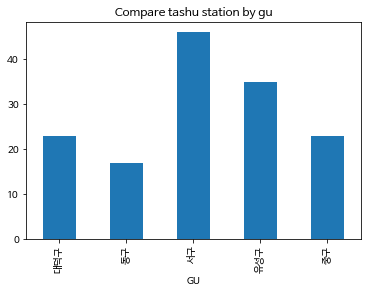

In [4]:
station_count_by_gu = station.groupby('GU').GU.count()
plt.title('Compare tashu station by gu')
station_count_by_gu.plot(kind='bar');
plt.show()

## 2. 각 구별 이용 횟수 비교

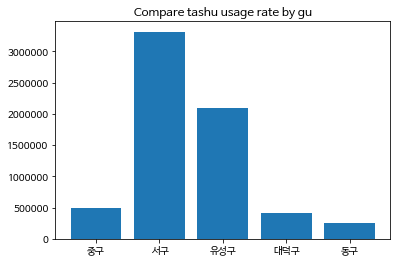

In [5]:
rent_station_count = tashu.groupby('RENT_STATION').RENT_STATION.count()
return_station_count = tashu.groupby('RETURN_STATION').RETURN_STATION.count()
    
sum_station_count = rent_station_count.add(return_station_count, fill_value=0).astype(int)
station_number = sum_station_count.index

station_gu = pd.Series(
    list(station['GU']),
    index=list(station['NUMBER'])
)

usage_rate = {'서구': 0, '유성구': 0, '중구': 0, '대덕구':0, '동구':0}
for i in range(1, len(sum_station_count)):
    if station_number[i] in station_gu:
        key = station_gu[station_number[i]]
        value = int(sum_station_count[i])
        usage_rate[key] = usage_rate[key] + value
    else:
        continue

plt.title('Compare tashu usage rate by gu')
plt.bar(range(len(usage_rate)), usage_rate.values(), align='center')
plt.xticks(range(len(usage_rate)), usage_rate.keys())
plt.show()

## 3. 요일별 이용 횟수 비교

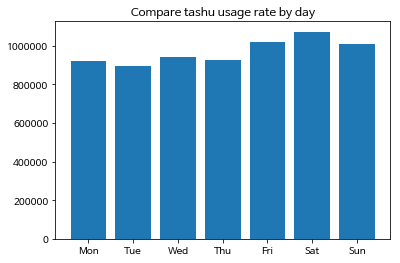

In [6]:
rent_date = tashu['RENT_DATE']
return_date = tashu['RETURN_DATE']

sum_weekday = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}
for r in rent_date:
    weekday = datetime.datetime.strptime(str(r), '%Y%m%d%H%M%S').weekday()
    sum_weekday[weekday] += 1

for r in return_date:
    weekday = datetime.datetime.strptime(str(r), '%Y%m%d%H%M%S').weekday()
    sum_weekday[weekday] += 1
    
plt.title('Compare tashu usage rate by day')
plt.bar(range(len(sum_weekday)), sum_weekday.values(), align='center')
plt.xticks(range(len(sum_weekday)), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

## 4. 시간별 이용 횟수 비교

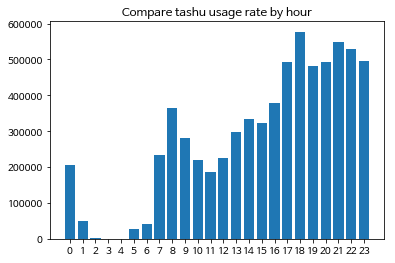

In [7]:
rent_date = tashu['RENT_DATE']
return_date = tashu['RETURN_DATE']

sum_hour = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0,
            8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0,
            15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0,
            22: 0, 23: 0
}

for r in rent_date:
    hour = datetime.datetime.strptime(str(r), '%Y%m%d%H%M%S').hour
    sum_hour[hour] += 1

for r in return_date:
    hour = datetime.datetime.strptime(str(r), '%Y%m%d%H%M%S').hour
    sum_hour[hour] += 1
    
plt.title('Compare tashu usage rate by hour')
plt.bar(range(len(sum_hour)), sum_hour.values(), align='center')
plt.xticks(range(len(sum_hour)), sum_hour.keys())
plt.show()